# Code from Notebook 2.5.3 (Adding Immunization to the Plague Code)

In [11]:
import pandas as pd
import numpy as np

def change_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    s = s - system['C'] * i * s
    i = i + system['C'] * i * s - system['R'] * i
    r = r + system['R'] * i
    return pd.Series(dict(s=s, i=i, r=r),name="State")

def run_simulation(system, change_func):
    state = pd.Series(dict(s=system['iS'], i=system['iI'], r=system['iR']))
    results = pd.DataFrame([],columns=state.index)
    results.loc[0] = state

    for t in range(0, system['t_end']):
        new_state = change_func(t, results.loc[t], system)
        results.loc[t+1] = new_state
    total_infected = calc_total_infected(results, system)
    return results, total_infected

def calc_total_infected(results, system):
    s_0 = results.s[0]
    s_end = results.s[system['t_end']]
    total = s_0 - s_end
    return total

def add_immunization(system, fraction):
    system['iS'] -= fraction
    system['iR'] += fraction
    return system

The immunized system experienced 15.5 % fewer infections than the non-immunized student 



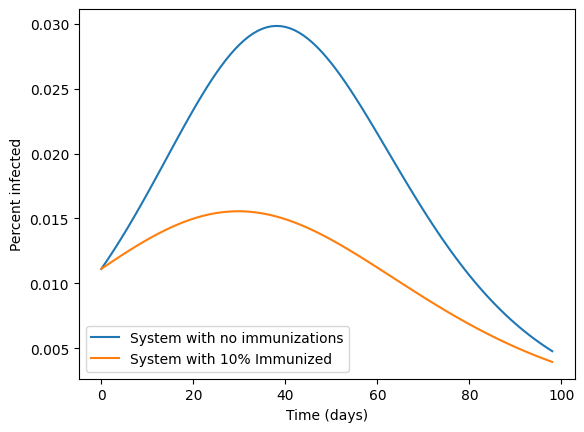

In [25]:
iS = 89; iI = 1; iR = 0
time_c = 4; time_r = 5; t_end = 14*7
N = iS + iI + iR

system1 = dict(iS=iS/N, iI=iI/N, iR=iR/N, N=N, C = 1/time_c,
              R = 1/time_r, t_end=t_end)

results1, total1 = run_simulation(system1, change_func)
system2 = add_immunization(system1, 0.1)
results2, total2 = run_simulation(system2, change_func)
results1.i.plot(xlabel = 'Time (days)', label = 'System with no immunizations',
                ylabel = 'Percent infected',legend=True)
results2.i.plot(legend=True, label='System with 10% Immunized')
print("The immunized system experienced", round((total1-total2)*100.0,1), "% fewer",
      "infections than the non-immunized student", '\n')